In [4]:
###########################################
# 开始研究输出结果 #
###########################################
def cal_ave_value(day,points,weather_map):
    n = len(points)-1
    prob = 1
    for item in points:
        prob = prob*weather_map[str(day-5)][str(item[2])][item[0]-1][item[1]-1]
    ave_time = 1440+(2*n-1440)*prob
    return ave_time

In [17]:
import pandas as pd
import pickle 
import numpy as np
from matplotlib import pyplot as plt
# 检查期望函数最小化的结果
# 载入数据
# p_result = pd.read_csv('submit_file_1225.csv')
# p_result.columns = ['id','day','time','xid','yid']
n_result = pd.read_csv('submit_file_final_0209_2.csv')
n_result.columns = ['id','day','time','xid','yid']
#file_weather = open('weather_online_output_1227_h_p.pkl', 'rb')
file_weather = open('layer_1_output_prob_final.pkl', 'rb')
weather_map = pickle.load(file_weather)

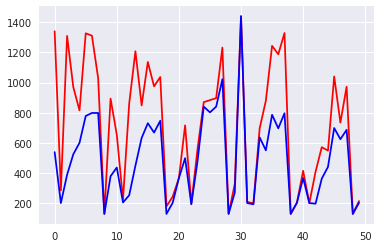

找到49个结果
如果全部成功，总共耗时24540.000000
期望总共耗时35682.935345


In [18]:
expected_time = []
real_time = []
for point in range(0,50):
    d = point//10+6
    i = point%10+1
    if len(n_result[(n_result.id==i)&(n_result.day==d)])!= 0:
        temp_n = n_result[(n_result.id==i)&(n_result.day==d)]
        temp_n['points'] = temp_n.apply(lambda x: (x.xid,x.yid,int(x.time[0:2])),axis = 1)
        expected_time.append(cal_ave_value(d,temp_n['points'].values,weather_map))
        real_time.append((len(temp_n)-1)*2)
    else:
        expected_time.append(1440)
        real_time.append(1440)
index = list(range(50))
plt.plot(index,expected_time,color='r')
plt.plot(index,real_time,color='b')
plt.show()
print('找到%d个结果'% (len([1 for i in real_time if i !=1440 ])))
print('如果全部成功，总共耗时%f'%(sum(real_time)))
print('期望总共耗时%f'%(sum(expected_time)))

In [10]:
# 路径分析
# 1 十个风速预测情况
# 2 路径p值变化情况
# 3 周围道路交通情况
# 展示某个路径的天气变化情况
import pickle
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore")

file_weather = open('../weather_map_all.pkl', 'rb')
weather_input_all = pickle.load(file_weather)


id = 2
day = 6

citys = pd.read_csv('CityData.csv')
# print(citys)
data_city = np.zeros([548, 421])
routes = n_result


line_test = routes[(routes.id==id)&((routes.day)==day)]

for i in range(1, 11):
    line_test[str(i)] = line_test.apply(lambda x: weather_input_all[str(i)][str(x.day)][str(int(str(x.time)[0:2]))][x.xid-1][x.yid-1], axis=1)

for i in range(1, 11):
    plt.plot(list(range(len(line_test))), line_test[str(i)], label=str(i))
line = []
for i in range(len(line_test)):
    line.append(15)
plt.plot(list(range(len(line_test))), line)
plt.show()
plt.plot()

# 2 路径p值变化情况

temp_n = n_result[(n_result.id==id)&(n_result.day==day)]
temp_n.reset_index(inplace = True,drop=True)
temp_n['weather'] = temp_n.apply(lambda x: weather_map[str(day-5)][str(int(x.time[0:2]))][x.xid-1][x.yid-1],axis = 1)
plt.plot(temp_n.index,temp_n['weather'],color = 'b')
plt.show()

# 3 周围道路交通情况
max_hour = int(temp_n.iloc[-1,2][0:2])
temp_n['hour'] = temp_n['time'].apply(lambda x:int(x[0:2]))

x_before = []
y_before = []
for h in range(3,max_hour+1):
    fig = plt.figure(figsize=(15,15))
    x = list(temp_n[temp_n.hour==h]['xid']-1)
    y = list(temp_n[temp_n.hour==h]['yid']-1)
    # heatmap 坐标颠倒
    plt.plot(y,x, color='b')
    #print(weather_map[str(day-5)][str(h)][x[0]][y[0]])
    if h>3:
        x_before.extend(list(temp_n[temp_n.hour==h-1]['xid']-1))
        y_before.extend(list(temp_n[temp_n.hour==h-1]['yid']-1))
        plt.plot(y_before,x_before, color='y')
    im = plt.imshow(weather_map[str(day-5)][str(h)])
    plt.colorbar(im, shrink=1)
    plt.title('%d hour'%(h))
    plt.show()
    #break



FileNotFoundError: [Errno 2] No such file or directory: '../weather_map_all.pkl'

In [9]:
stat

time  xid  yid  time_save
id day                           
1  6     276  276  276        890
   8     214  214  214       1014
   9     485  485  485        472
2  6     101  101  101       1240
   7     101  101  101       1240
   8     101  101  101       1240
   9     101  101  101       1240
   10    105  105  105       1232
3  6     194  194  194       1054
   8     325  325  325        792
   9     510  510  510        422
4  8     496  496  496        450
5  6     487  487  487        468
   8     229  229  229        984
6  6     482  482  482        478
   8     360  360  360        722
7  6     520  520  520        402
   8     336  336  336        770
8  8     352  352  352        738
9  6      65   65   65       1312
   7      65   65   65       1312
   8     148  148  148       1146
   9      65   65   65       1312
   10     72   72   72       1298
10 6     192  192  192       1058
   7     111  111  111       1220
   8     457  457  457        528

In [33]:
# 猜测有哪些点成功，哪些点失败
# (9,10)(2,10）可能可以手动调整，同生死
# (10,8)(4,8)(3,8)(1,8) 同生死
# 成功点(1240, 1240, 1240, 1240, 1232, 422, 468, 478, 770, 1312, 1312, 1146, 1312, 1298)
import itertools
import pandas as pd
from collections import Counter
import operator
from tqdm import tqdm as tqdm
# 猜哪些点成功了，哪些点失败了
submit = n_result
stat = submit.groupby(['id', 'day']).count()
stat['time_save'] = stat['time'].apply(lambda x: 24*60-(x-1)*2)
print('一共节省%f分钟'%(sum(stat['time_save'])))
dest = 72000-57290
time_save = list(stat['time_save'])
element = []
i = 0
print('以下组合可能成功')
for L in tqdm(range(0, len(time_save)+1)):
    for subset in itertools.combinations(time_save, L):
        #if sum(subset)==dest and subset.count(1240)>2 and(422 in subset) and (470 in subset) and (892 not in subset)  and (722 in subset)and  (768 in subset) and(1236 in subset) and(1312 in subset) and (1284 in subset) and (1144 in subset):
        if sum(subset)==dest and subset.count(1240)==4 and subset.count(1014)+subset.count(792)+subset.count(450)+subset.count(528) in (0,4) and subset.count(1312)==3 and (1146 in subset) and subset.count(1232)+subset.count(1298) in (0,2):

            print(subset)
            i += 1
            for item in subset:
                element.append(item)
print(i)
elem_dict = {}
# 统计出现的词频
for item in element:
    if str(item) in elem_dict.keys():
        elem_dict[str(item)] += 1
    else:
        elem_dict[str(item)] = 1
# print(elem_dict)
print(sorted(elem_dict.items(), key=operator.itemgetter(1)))
for item in stat['time_save']:
    if str(item) not in elem_dict.keys():
        print('绝逼失败的点')
        print(item)

  0%|          | 0/28 [00:00<?, ?it/s]

一共节省25034.000000分钟
以下组合可能成功


 46%|████▋     | 13/28 [00:39<00:45,  3.02s/it]

(890, 1240, 1240, 1240, 1240, 1232, 478, 770, 1312, 1312, 1146, 1312, 1298)


 50%|█████     | 14/28 [00:58<00:58,  4.14s/it]

(1240, 1240, 1240, 1240, 1232, 422, 468, 478, 770, 1312, 1312, 1146, 1312, 1298)


 54%|█████▎    | 15/28 [01:17<01:07,  5.19s/it]

(890, 472, 1240, 1240, 1240, 1240, 468, 478, 402, 738, 1312, 1312, 1146, 1312, 1220)
(890, 1240, 1240, 1240, 1240, 422, 984, 478, 722, 402, 770, 1312, 1312, 1146, 1312)
(1014, 1240, 1240, 1240, 1240, 792, 422, 450, 984, 478, 1312, 1312, 1146, 1312, 528)


100%|██████████| 28/28 [02:08<00:00,  4.60s/it]

5
[('1014', 1), ('450', 1), ('1220', 1), ('792', 1), ('472', 1), ('738', 1), ('722', 1), ('528', 1), ('984', 2), ('1232', 2), ('402', 2), ('468', 2), ('1298', 2), ('422', 3), ('770', 3), ('890', 3), ('1146', 5), ('478', 5), ('1312', 15), ('1240', 20)]
绝逼失败的点
1054
绝逼失败的点
1058


In [73]:
# 猜测有哪些点成功，哪些点失败 0124
import itertools
import pandas as pd
from collections import Counter
import operator
from tqdm import tqdm as tqdm
# 猜哪些点成功了，哪些点失败了
submit = n_result
stat = submit.groupby(['id', 'day']).count()
stat['time_save'] = stat['time'].apply(lambda x: 24*60-(x-1)*2)
print('一共节省%f分钟'%(sum(stat['time_save'])))
dest = 72000-58386
time_save = list(stat['time_save'])
element = []
i = 0
print('以下组合可能成功')
for L in tqdm(range(0, len(time_save)+1)):
    for subset in itertools.combinations(time_save, L):
        #if sum(subset)==dest and subset.count(1240)>2 and(422 in subset) and (470 in subset) and (892 not in subset)  and (722 in subset)and  (768 in subset) and(1236 in subset) and(1312 in subset) and (1284 in subset) and (1144 in subset):
        if sum(subset)==dest and subset.count(1240)>2 and (1296 in subset) and (892 not in subset)  and (722 in subset)and  (768 in subset) and(1236 in subset) and(1312 in subset) and (1284 in subset) and (1144 in subset):

            print(subset)
            i += 1
            for item in subset:
                element.append(item)
print(i)
elem_dict = {}
# 统计出现的词频
for item in element:
    if str(item) in elem_dict.keys():
        elem_dict[str(item)] += 1
    else:
        elem_dict[str(item)] = 1
# print(elem_dict)
print(sorted(elem_dict.items(), key=operator.itemgetter(1)))
for item in stat['time_save']:
    if str(item) not in elem_dict.keys():
        print('绝逼失败的点')
        print(item)

  0%|          | 0/28 [00:00<?, ?it/s]

一共节省24700.000000分钟
以下组合可能成功


 50%|█████     | 14/28 [00:57<00:57,  4.09s/it]

(470, 1240, 1236, 1240, 1240, 722, 400, 768, 736, 1312, 1284, 1144, 1296, 526)
(470, 1240, 1236, 1240, 1240, 722, 400, 768, 736, 1284, 1144, 1312, 1296, 526)
(1240, 1236, 1240, 1240, 422, 448, 722, 768, 736, 1312, 1284, 1144, 1296, 526)
(1240, 1236, 1240, 1240, 422, 448, 722, 768, 736, 1284, 1144, 1312, 1296, 526)


100%|██████████| 28/28 [02:07<00:00,  4.56s/it]

4
[('400', 2), ('470', 2), ('448', 2), ('422', 2), ('722', 4), ('1312', 4), ('736', 4), ('768', 4), ('526', 4), ('1236', 4), ('1284', 4), ('1296', 4), ('1144', 4), ('1240', 12)]
绝逼失败的点
892
绝逼失败的点
1012
绝逼失败的点
1228
绝逼失败的点
834
绝逼失败的点
782
绝逼失败的点
464
绝逼失败的点
980
绝逼失败的点
472
绝逼失败的点
1022
绝逼失败的点
1218


In [186]:
stat

time  xid  yid  time_save
id day                           
1  6     275  275  275        892
   8     215  215  215       1012
   9     486  486  486        470
2  6     101  101  101       1240
   7     103  103  103       1236
   8     101  101  101       1240
   9     101  101  101       1240
   10    107  107  107       1228
3  6     304  304  304        834
   8     330  330  330        782
   9     510  510  510        422
4  8     497  497  497        448
5  6     489  489  489        464
   8     231  231  231        980
6  6     485  485  485        472
   8     360  360  360        722
7  6     521  521  521        400
   8     337  337  337        768
8  8     353  353  353        736
9  6      65   65   65       1312
   7      79   79   79       1284
   8     149  149  149       1144
   9      65   65   65       1312
   10     73   73   73       1296
10 6     210  210  210       1022
   7     112  112  112       1218
   8     458  458  458        526

In [19]:
a =(2,3,2)
a.count(2)

2